In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
## check null value
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [39]:
X = df[['Weight']]
y = df['Height']

Text(0, 0.5, 'Height')

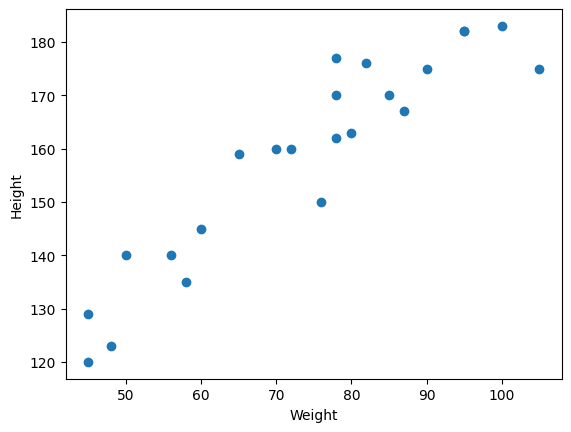

In [40]:
plt.scatter(X, y)
plt.xlabel("Weight")
plt.ylabel("Height")

In [41]:
print(X.shape)
np.array(X).shape

(23, 1)


(23, 1)

In [42]:
print(y.shape)
np.array(y).shape

(23,)


(23,)

In [43]:
## create the train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [44]:
print(X_train.shape)
print(y_train.shape)

(16, 1)
(16,)


In [45]:
print(X_test.shape)
print(y_test.shape)

(7, 1)
(7,)


In [34]:
## X_train data fir transform Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [35]:
X_train

2      48
1      58
0      45
21     56
19     87
11     95
8      95
3      60
18     76
20     45
16     50
6      80
9      78
10     82
7      90
12    105
Name: Weight, dtype: int64

In [38]:
X_train = scaler.fit_transform(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 48.  58.  45.  56.  87.  95.  95.  60.  76.  45.  50.  80.  78.  82.
  90. 105.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
## apply linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred


array([130.14438484, 182.86498946, 162.83115971, 169.15763226,
       193.40911038, 143.85174204, 188.13704992])

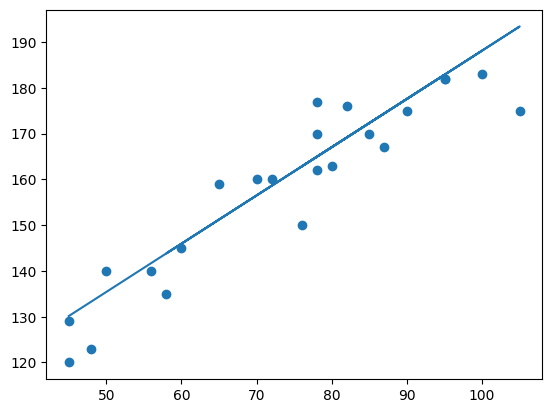

In [49]:
## plot
plt.scatter(X, y)
plt.plot(X_test, y_pred)

In [51]:
## prediction

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

9.011543442761413

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

108.39305293415696

In [53]:
rmse = np.sqrt(mse)
rmse

10.411198438900152

In [54]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
r2_score

0.8013145445992185

In [56]:
## OLS Regression

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()



In [57]:
prediction = model.predict(X_test)
prediction

0      97.553733
8     205.946770
18    164.757416
10    177.764580
12    227.625377
1     125.735923
13    216.786074
dtype: float64

In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1146.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                    1.40e-15
Time:                        07:40:03   Log-Likelihood:                         -68.968
No. Observations:                  16   AIC:                                      139.9
Df Residuals:                      15   BIC:                                      140.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###################################################

NEW DATA SET

###################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
### delete unwanted column

df.drop(['Unnamed: 0'], axis = 1)

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [5]:
### check is there any null value

df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
### check how many years data

df['year'].unique()

array([2017, 2016])

Text(0, 0.5, 'index_price')

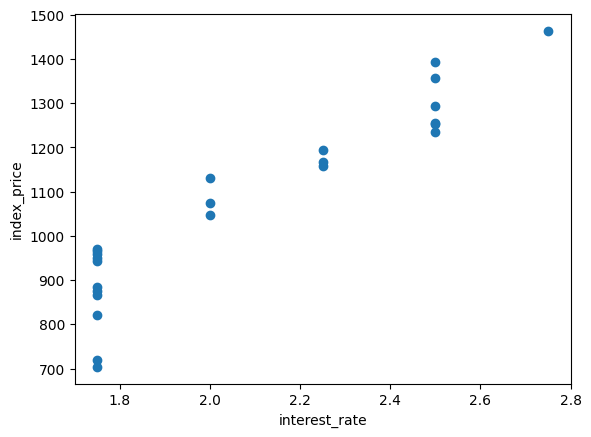

In [9]:
### plot scatter plot

plt.scatter(df['interest_rate'], df['index_price'])
plt.xlabel("interest_rate")
plt.ylabel("index_price")

Text(0, 0.5, 'index_price')

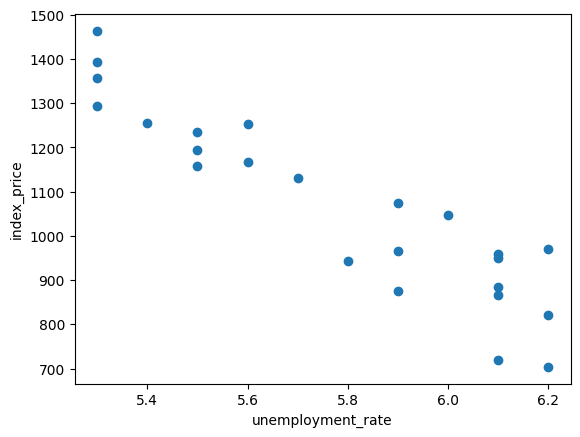

In [10]:
plt.scatter(df['unemployment_rate'], df['index_price'])
plt.xlabel("unemployment_rate")
plt.ylabel("index_price")

(array([[24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.],
        [24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  9.,  6.,  6.,  1.,  0.,  0.]]),
 array([   0. ,  201.7,  403.4,  605.1,  806.8, 1008.5, 1210.2, 1411.9,
        1613.6, 1815.3, 2017. ]),
 <a list of 6 BarContainer objects>)

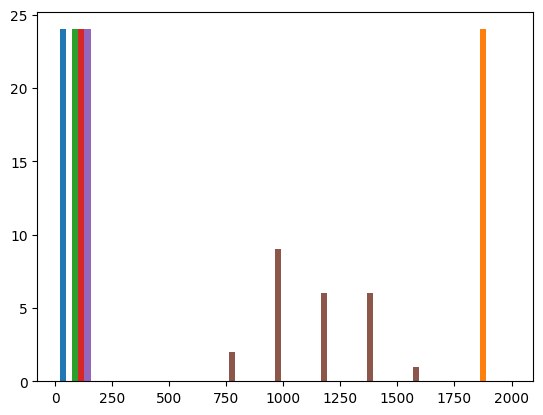

In [20]:
plt.hist(df)

<Axes: xlabel='year', ylabel='index_price'>

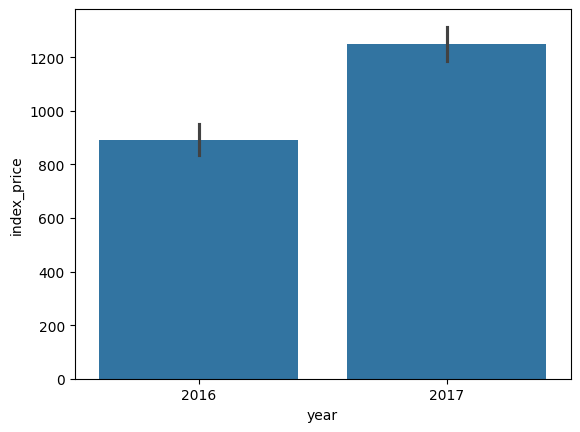

In [22]:
sns.barplot(x= df['year'], y=df['index_price'])

In [11]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [16]:
### create test and test set

X = df.drop(['index_price', 'Unnamed: 0'], axis = 1)
y = df['index_price']

In [17]:
print(X.shape)
print(y.shape)

(24, 4)
(24,)


In [25]:
### create test and train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)


In [26]:
print(X_train.shape)
print(X_test.shape)

(19, 4)
(5, 4)


In [28]:
print(y_train.shape)
print(y_test.shape)

(19,)
(5,)


In [29]:
#### now transform the X_train data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)

In [31]:
X_test = sc.fit_transform(X_test)

In [32]:
### Apply the linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([1150.41759337,  884.8466213 , 1345.80520799,  834.72590729,
       1081.30993321])

In [34]:
### evaluate the model

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

53.7029206530593

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

4786.764538663305

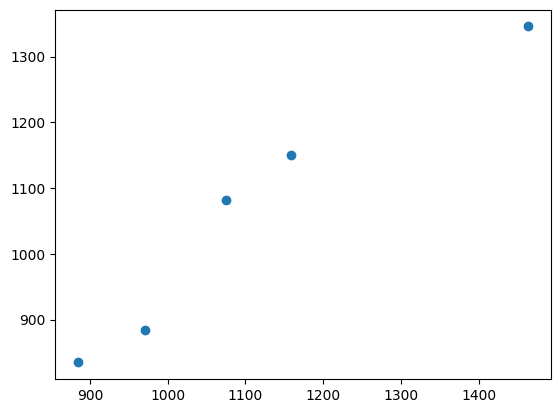

In [36]:
plt.scatter(y_test, y_pred)

In [37]:
### cross validation

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(lr, X_train, y_train, cv = 3)
validation_score

array([0.97246687, 0.94285441, 0.97807038])

In [39]:
np.mean(validation_score)

0.9644638884458899

In [42]:
validation_score = cross_val_score(lr, X, y, cv = 3)
validation_score

array([0.8932758 , 0.08365035, 0.42934762])

In [47]:
np.mean(validation_score)

0.4687579249619496

###############################################

New data set with ridge and lasso

################################################

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [50]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [51]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [52]:
### check null values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [53]:
### apply encoding to the classes column

df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


In [54]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [55]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [56]:
### Divide the X and y

X = df.drop(['FWI'], axis = 1)
y = df['FWI']

In [57]:
## Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [58]:
print(X_train.shape)
print(y_train.shape)

(170, 14)
(170,)


In [59]:
print(X_test.shape)
print(y_test.shape)

(73, 14)
(73,)


In [101]:
## heatmap with the correlation
print(X_train)
corr = X_train.corr()

[[ 1.56765151 -1.30687831  0.         ...  0.75507842  0.90992142
  -1.        ]
 [ 1.45605153  1.39153439  0.         ... -0.94987343 -1.098996
  -1.        ]
 [ 0.78645164  1.39153439  0.         ... -0.50510338 -1.098996
  -1.        ]
 ...
 [-1.66874796  1.39153439  0.         ... -1.03074071 -1.098996
  -1.        ]
 [ 1.45605153 -0.40740741  0.         ...  0.16205169  0.90992142
   1.        ]
 [-0.55274815  1.39153439  0.         ... -0.99030707 -1.098996
  -1.        ]]


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Axes: >

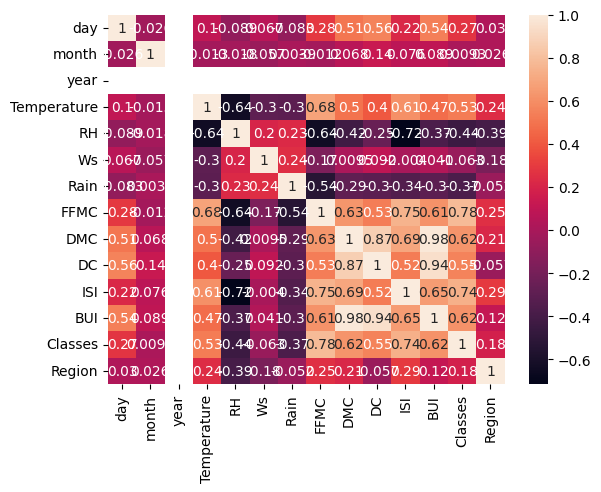

In [64]:
sns.heatmap(corr, annot = True)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def correlation(dataset, threshold):
    col_corr = set()
    print(dataset)
    corr_matrix = dataset.corr()

    return col_corr

In [100]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

[[ 1.56765151 -1.30687831  0.         ...  0.75507842  0.90992142
  -1.        ]
 [ 1.45605153  1.39153439  0.         ... -0.94987343 -1.098996
  -1.        ]
 [ 0.78645164  1.39153439  0.         ... -0.50510338 -1.098996
  -1.        ]
 ...
 [-1.66874796  1.39153439  0.         ... -1.03074071 -1.098996
  -1.        ]
 [ 1.45605153 -0.40740741  0.         ...  0.16205169  0.90992142
   1.        ]
 [-0.55274815  1.39153439  0.         ... -0.99030707 -1.098996
  -1.        ]]


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [87]:
|### Feature scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'Before scaling the data')

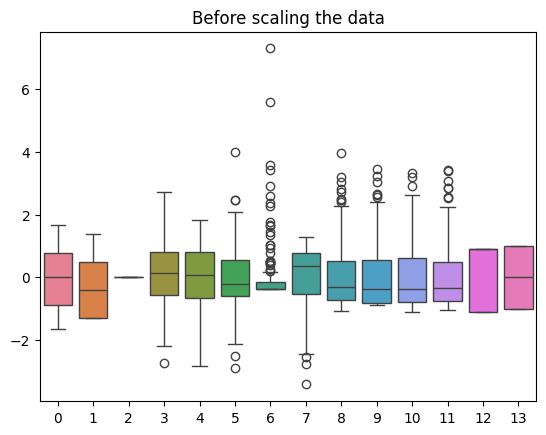

In [88]:
sns.boxplot(data= X_train)
plt.title("Before scaling the data")

Text(0.5, 1.0, 'After scaling the data')

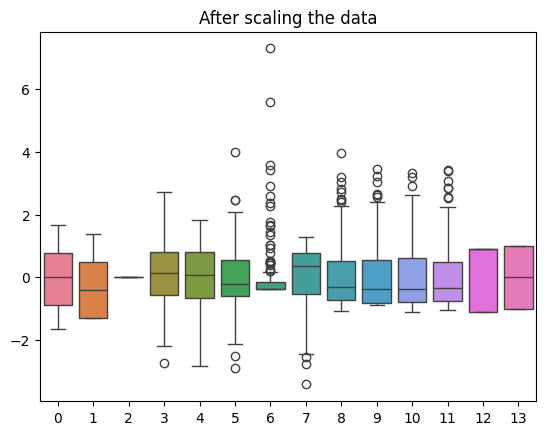

In [89]:
sns.boxplot(data=X_train_scaled)
plt.title("After scaling the data")

<ipython-input-90-41fb1d7ced73>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

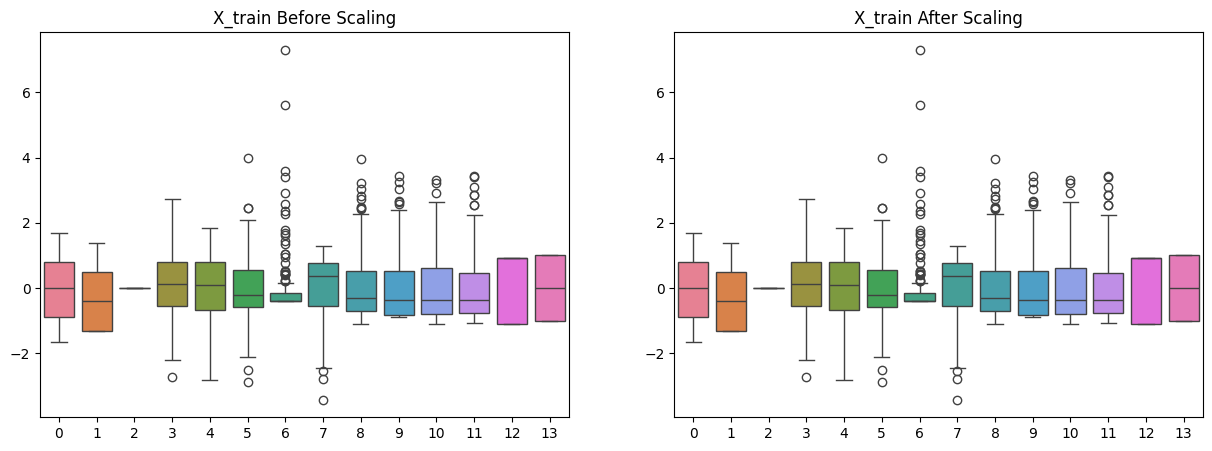

In [90]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [78]:
### Implement linear regression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test)

In [79]:
## evaluate
from sklearn.metrics import mean_absolute_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
mae

0.9241691764501829

In [80]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.9681034493995865

Text(0, 0.5, 'predicted')

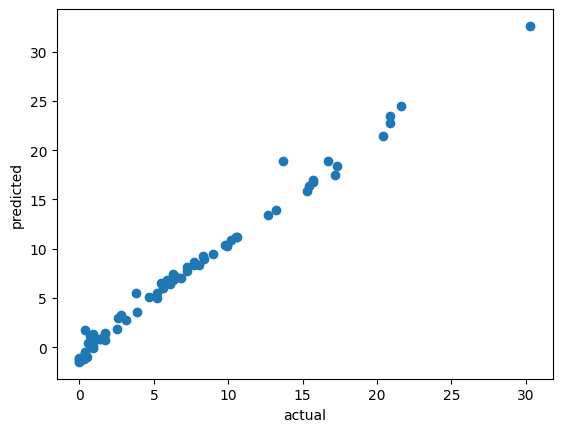

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

In [103]:
### Lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lr1 = Lasso()
lr1.fit(X_train, y_train)
y_pred_lr1 = lr1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr1)
print(mae)

r2_score = r2_score(y_test, y_pred_lr1)
print(r2_score)

0.7979919951632514
0.977490911546697


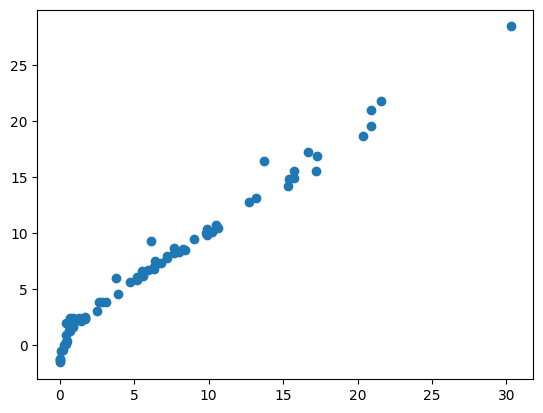

In [104]:
plt.scatter(y_test, y_pred_lr1)

In [102]:
|#### Ridge Regularization

from sklearn.linear_model import Ridge

lr2 = Ridge()
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

In [108]:
mae = mean_absolute_error(y_test, y_pred_lr2)
print(mae)

r2_score = r2_score(y_test, y_pred_lr2)
print(r2_score)

0.9098776038189336


TypeError: 'numpy.float64' object is not callable

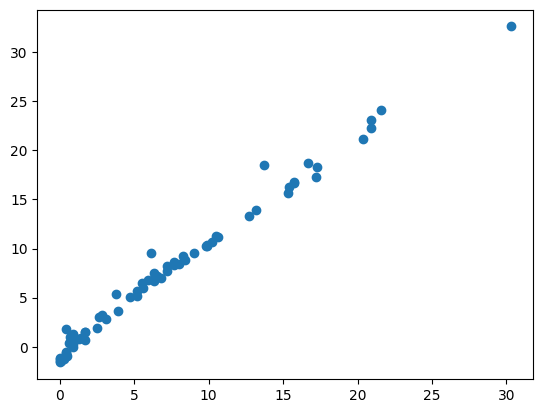

In [109]:
plt.scatter(y_test, y_pred_lr2)